# Курсовой проект для курса "Python для Data Science"
## Задание:
Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели предсказать цены для квартир из файла test.csv.

## Целевая переменная:
Price

## Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

## Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту") ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook  с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу SShirkin_predictions.csv с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price). В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

## Сроки и условия сдачи:
Дедлайн: сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
Успешный проект нельзя пересдать в целях повышения результата.
Проекты, сданные после дедлайна или сданные повторно, не попадают в топ лучших результатов, но можно узнать результат.
В качестве итогового результата берется первый успешный результат, последующие успешные результаты не учитываются.

## Примечания:
Все файлы csv должны содержать названия полей (header - то есть "шапку"), разделитель - запятая.
В файлах не должны содержаться индексы из датафрейма.
Самая сложная из допустимых моделей - RandomForestRegressor из sklearn.

# Импорт данных

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
pd.options.display.max_columns = 100

In [100]:
csv_data = pd.read_csv('train.csv')
csv_data.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524


In [101]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


# One Hot Encoding

In [102]:
print('Ecology_2 unique:', csv_data['Ecology_2'].unique())
print('Ecology_3 unique:', csv_data['Ecology_3'].unique())
print('Shops_2 unique:', csv_data['Shops_2'].unique())

Ecology_2 unique: ['B' 'A']
Ecology_3 unique: ['B' 'A']
Shops_2 unique: ['B' 'A']


In [128]:
data = pd.get_dummies(csv_data, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])
data.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1


In [104]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Корелляция

In [129]:
full_corr = data.corr()
perceptible_corr = full_corr.where((np.abs(full_corr) > 0.1) & (np.abs(full_corr) < 1))
perceptible_corr

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,NaN,NaN,NaN,NaN,NaN,NaN,-0.120373,-0.149051,NaN,NaN,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,NaN,NaN,NaN,0.662893,0.131336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550291,NaN,NaN,NaN,NaN,NaN,NaN
Square,NaN,NaN,0.662893,NaN,0.196129,NaN,0.114791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520075,NaN,NaN,NaN,NaN,NaN,NaN
LifeSquare,NaN,NaN,0.131336,0.196129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,NaN,-0.120373,NaN,0.114791,NaN,NaN,NaN,0.418986,NaN,NaN,NaN,NaN,NaN,-0.138294,NaN,NaN,0.128715,NaN,NaN,NaN,NaN,NaN,NaN
HouseFloor,NaN,-0.149051,NaN,NaN,NaN,NaN,0.418986,NaN,NaN,NaN,NaN,NaN,NaN,-0.143973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecology_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.124068,NaN,NaN,NaN,NaN,0.110725,-0.110725,0.223197,-0.223197,NaN,NaN


Колонки, влияющие на цену

In [162]:
price_corr_columns = perceptible_corr[['Price']].dropna().sort_values('Price', ascending=False)
print(price_corr_columns.index.values)
price_corr_columns

['Rooms' 'Square' 'DistrictId' 'Social_1' 'Helthcare_2' 'Social_2'
 'Shops_1' 'Healthcare_1' 'Floor']


,Price
Rooms,0.550291
Square,0.520075
DistrictId,0.265100
Social_1,0.263286
Helthcare_2,0.253090
Social_2,0.239226
Shops_1,0.180876
Healthcare_1,0.138755
Floor,0.128715


# Выбросы 'Rooms'

In [122]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

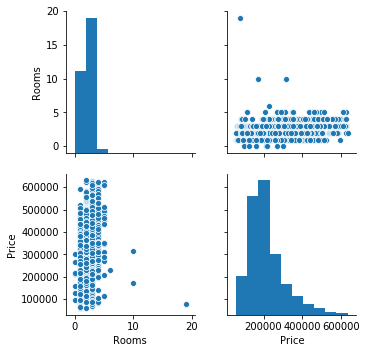

In [125]:
sns.pairplot(data.loc[:, ['Rooms', 'Price']])

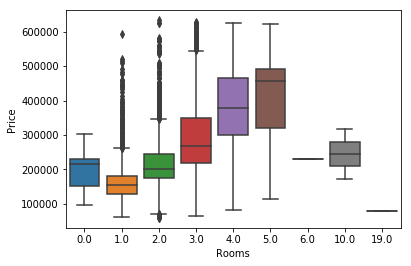

In [120]:
sns.boxplot(data['Rooms'], data['Price'])

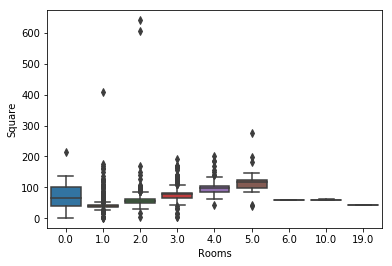

In [136]:
sns.boxplot(data['Rooms'], data['Square'])

In [135]:
data.where(data['Rooms'] == 5.0).dropna()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1422,4282.0,195.0,5.0,95.617533,62.377052,7.0,7.0,7.0,1940.0,0.015017,17.0,3079.0,59.0,2890.0,0.0,8.0,479525.147323,0.0,1.0,0.0,1.0,0.0,1.0
1503,1243.0,86.0,5.0,108.057398,82.723825,8.0,3.0,5.0,1942.0,0.161976,31.0,7010.0,5.0,4508.0,3.0,7.0,310305.074733,0.0,1.0,1.0,0.0,0.0,1.0
1982,5548.0,86.0,5.0,275.645284,233.949309,26.0,12.0,37.0,2011.0,0.161976,31.0,7010.0,5.0,4508.0,3.0,7.0,455264.882666,0.0,1.0,1.0,0.0,0.0,1.0
4431,7594.0,53.0,5.0,39.906082,39.394024,1.0,5.0,1.0,1977.0,0.049637,34.0,7759.0,0.0,229.0,1.0,3.0,206148.845716,0.0,1.0,0.0,1.0,0.0,1.0
5361,2879.0,78.0,5.0,118.871952,69.023509,10.0,15.0,16.0,1998.0,0.092291,21.0,4346.0,2.0,165.0,1.0,2.0,496026.671162,0.0,1.0,0.0,1.0,0.0,1.0
5466,3454.0,8.0,5.0,112.135525,79.795451,10.0,4.0,17.0,1999.0,0.437885,23.0,5735.0,3.0,1084.0,0.0,5.0,471833.787538,0.0,1.0,0.0,1.0,0.0,1.0
6623,3294.0,167.0,5.0,111.045799,81.940459,9.0,6.0,6.0,1940.0,0.050272,21.0,4231.0,14.0,1020.0,0.0,3.0,513239.499082,0.0,1.0,0.0,1.0,0.0,1.0
8925,4214.0,105.0,5.0,85.313605,56.686693,5.0,4.0,12.0,1967.0,0.040243,25.0,3478.0,11.0,2729.0,3.0,1.0,461678.738428,0.0,1.0,0.0,1.0,0.0,1.0
9699,4971.0,169.0,5.0,117.855969,76.561318,9.0,12.0,14.0,2001.0,0.178917,18.0,3594.0,4.0,192.0,1.0,5.0,608674.130507,0.0,1.0,0.0,1.0,0.0,1.0


In [99]:
data.groupby('Rooms')[['Price']].count()
data.groupby('Rooms')[['Price']].mean()

,Price
Rooms,
0.0,200435.886261
1.0,159850.800729
2.0,215256.306416
3.0,289337.962452
4.0,383251.100956
5.0,410431.605679
6.0,229661.964416
10.0,244797.297328
19.0,78364.616704


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(
    data.loc[:, ~data.columns.isin(['Id', 'Price', 'Healthcare_1', 'LifeSquare'])], 
    data.loc[:, data.columns == 'Price'], 
    test_size=0.25, 
    random_state=42
)

In [171]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
DecisionTreeClassifier?
# dtr.fit(x_train, y_train)
# y_pred = dtr.predict(x_test)
# r2_score(y_test, y_pred)

Init signature:
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded unt

# Предсказание
Наблюдаем за изменением главной метрики

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(
    data.loc[:, ~data.columns.isin(['Id', 'Price', 'Healthcare_1', 'LifeSquare'])], 
    data.loc[:, data.columns == 'Price'], 
    test_size=0.25, 
    random_state=42
)

In [170]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.44783002525616655

In [168]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)
r2_score(y_test, y_pred)

0.5035042985716351